# Automatidata - Regression Analysis

This work involves the development and experimental evaluation of a multiple linear regression model, based on the findinds of the exploratory data analysis (EDA). More specifically, we want to build a regression model for ride fares based on a variety of variables. Multiple linear regression allows us to assess the linear relationship between one continuous target variable and multiple independent variables. It enables a more thorough analysis by considering multiple variables at once.

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [162]:
# reading the data
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df = df0.copy()
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [164]:
print("Shape of dataframe:", df.shape)
print("Shape of dataframe with duplicates dropped:", df.drop_duplicates().shape)
print("Total count of missing values:", df.isna().sum().sum())

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0


In [165]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Outliers can have a substantial impact on linear regression models. After visualizing the data, it is essential to plan how to handle outliers, which could include removing rows, replacing extreme values with averages or excluding values beyond three standard deviations. It is also important to handle missing data appropriately, determining if values should be excluded or substituted using means, medians or similar methods. The given dataset contains no duplicates or missing entries. Additionally, examining multicollinearity among predictors helps understand their relationships, which is critical when assessing the model's inferences. Finally, creating new features, such as calculating a duration variable by subtracting the pickup time from the drop-off time, can also be beneficial.

In [166]:
# converting datetime columns to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

In [167]:
# creating new column for the trip duration
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]) / np.timedelta64(1,"m")

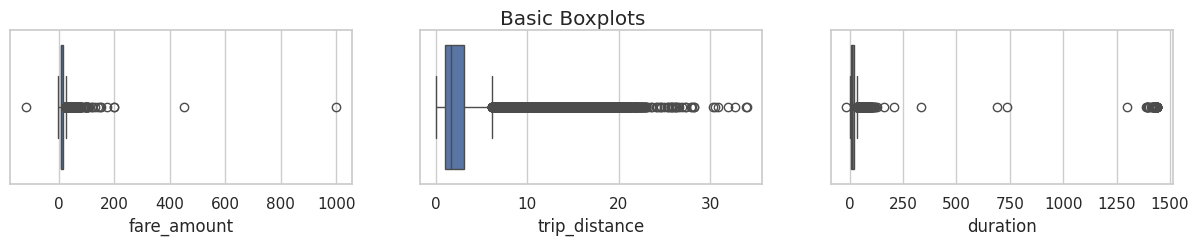

In [168]:
# creating boxplots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle("Basic Boxplots")
sns.boxplot(ax=axes[0], x=df["fare_amount"])
sns.boxplot(ax=axes[1], x=df["trip_distance"])
sns.boxplot(ax=axes[2], x=df["duration"])
plt.show()

In [169]:
def check_rush_hour(hour):
    """
    This function checks if the input corresponds to rush hour.
    """
    if not (6 <= hour["rush_hour"] < 10 or 16 <= hour["rush_hour"] < 20):
        return 0
    return 1


def impute_df_outliers(col_name, iqr_coeff):
    """
    This function imputes upper-limit values in a specified column based on its interquartile range.
    """
    # reassigning minimum to zero
    df.loc[df[col_name] < 0, col_name] = 0

    # calculating upper threshold based on quartile values
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = (iqr_coeff * iqr) + q3
    print(col_name)
    print("Q3:", q3)
    print("Upper Threshold:", upper_threshold)

    # reassigning large values to threshold
    df.loc[df[col_name] > upper_threshold, col_name] = upper_threshold
    print(df[col_name].describe())

In [170]:
# checking trips with distance 0
sum(df["trip_distance"]==0)
sorted(set(df["trip_distance"]))[:10]

# replacing negative values (less than $0) with 0 for the fare amount
df.loc[df["fare_amount"] < 0, "fare_amount"] = 0
print("Minimum Trip Distance:", df["fare_amount"].min())

# replacing negative values with 0 for the fare amount
df.loc[df["duration"] < 0, "duration"] = 0
print("Minimum Trip Duration:", df["duration"].min())

Minimum Trip Distance: 0.0
Minimum Trip Duration: 0.0


In [171]:
# imputing the high outliers for the fare amount
impute_df_outliers("fare_amount", 6)

fare_amount
Q3: 14.5
Upper Threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


In [172]:
# imputing the high outliers for the trip duration
impute_df_outliers("duration", 6)

duration
Q3: 18.383333333333333
Upper Threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


Several observations arise from the summary statistics and the graphs. Notably, there are outliers in various fields, such as the tip amount and the total amount. Some variables like the tax remain nearly constant, suggesting they may not significantly contribute to prediction. The variables for the fare amount and the duration exhibit high-value outliers that should be adjusted, while trip distance is left as is due to the reasonable distribution of its values. For instance, negative fare values are problematic, while zero fares could be valid if a trip was canceled. High fare amounts like those nearing \$1,000 appear unlikely and can be capped using a more reasonable threshold. For example, using a factor of 6 with the interquartile range yields a cap of \$62.50.

In [173]:
# creating new column for pairs of pickup and dropoff location
df["pickup_dropoff"] = df["PULocationID"].astype(str) + " " + df["DOLocationID"].astype(str)

In [174]:
# creating new column for the average distance between pickup and dropoff locations
grouped = df.groupby("pickup_dropoff").mean(numeric_only=True)[["trip_distance"]]
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict["trip_distance"]
df["mean_distance"] = df["pickup_dropoff"]
df["mean_distance"] = df["mean_distance"].map(grouped_dict)
df[(df["PULocationID"]==100) & (df["DOLocationID"]==231)][["mean_distance"]]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [175]:
# creating new column for the average duration between pickup and dropoff locations
grouped = df.groupby("pickup_dropoff").mean(numeric_only=True)[["duration"]]
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict["duration"]
df["mean_duration"] = df["pickup_dropoff"]
df["mean_duration"] = df["mean_duration"].map(grouped_dict)
df[(df["PULocationID"]==100) & (df["DOLocationID"]==231)][["mean_duration"]]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [176]:
# creating new column for the day
df["day"] = df["tpep_pickup_datetime"].dt.day_name().str.lower()

# creating new column for the month
df["month"] = df["tpep_pickup_datetime"].dt.strftime("%b").str.lower()

# creating new column for rush hour
df["rush_hour"] = df["tpep_pickup_datetime"].dt.hour

# initializing rush hour values for weekend trips (no rush hour during the weekend)
df.loc[df["day"].isin(["sunday", "saturday"]), "rush_hour"] = 0

# finding whether a trip is during rush hour or not
df.loc[(df.day != "sunday") & (df.day != "saturday"), "rush_hour"] = df.apply(check_rush_hour, axis=1)

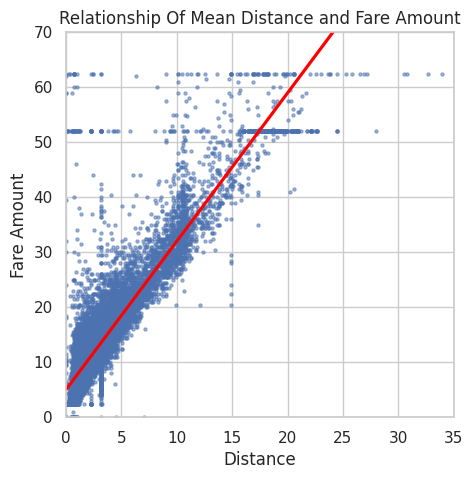

In [177]:
# creating scatterplot of distance and fare amount with a line of best fit
sns.set(style="whitegrid")
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.regplot(x=df["mean_distance"],
                 y=df["fare_amount"],
                 scatter_kws={"alpha":0.5, "s":5},
                 line_kws={"color":"red"})
plt.ylim(0, 70)
plt.xlim(0, 35)
plt.title("Relationship Of Mean Distance and Fare Amount")
ax.set_xlabel("Distance")
ax.set_ylabel("Fare Amount")
plt.show()

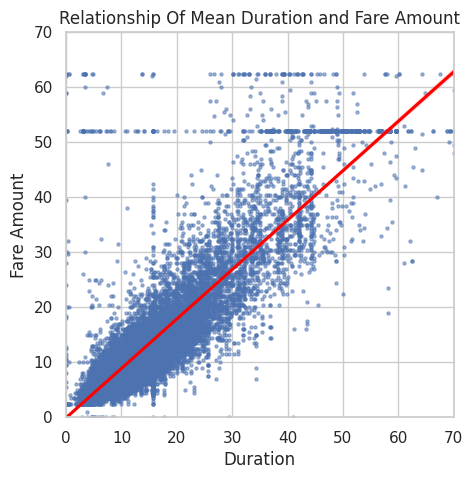

In [178]:
# creating scatterplot of duration and fare amount with a line of best fit
sns.set(style="whitegrid")
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
ax = sns.regplot(x=df["mean_duration"], y=df["fare_amount"],
            scatter_kws={"alpha":0.5, "s":5},
            line_kws={"color":"red"})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title("Relationship Of Mean Duration and Fare Amount")
ax.set_xlabel("Duration")
ax.set_ylabel("Fare Amount")
plt.show()

In [179]:
df[df["fare_amount"] > 50]["fare_amount"].value_counts().head()

,count
fare_amount,
52.0,514
62.5,84
59.0,9
50.5,9
57.5,8


Among the dataset's entries, 514 trips have fares fixed at \$52, mostly connected to location 132, likely indicating an airport due to the presence of tolls and other characteristics. Using the RatecodeID field, known from the data dictionary, these rates can be included back into the dataset post-prediction to ensure consistency in those data points.

In [180]:
df2 = df.copy()
df2 = df2.drop(["Unnamed: 0", "tpep_dropoff_datetime", "tpep_pickup_datetime",
               "trip_distance", "RatecodeID", "store_and_fwd_flag", "PULocationID", "DOLocationID",
               "payment_type", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge",
               "total_amount", "tpep_dropoff_datetime", "tpep_pickup_datetime", "duration",
               "pickup_dropoff", "day", "month"], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


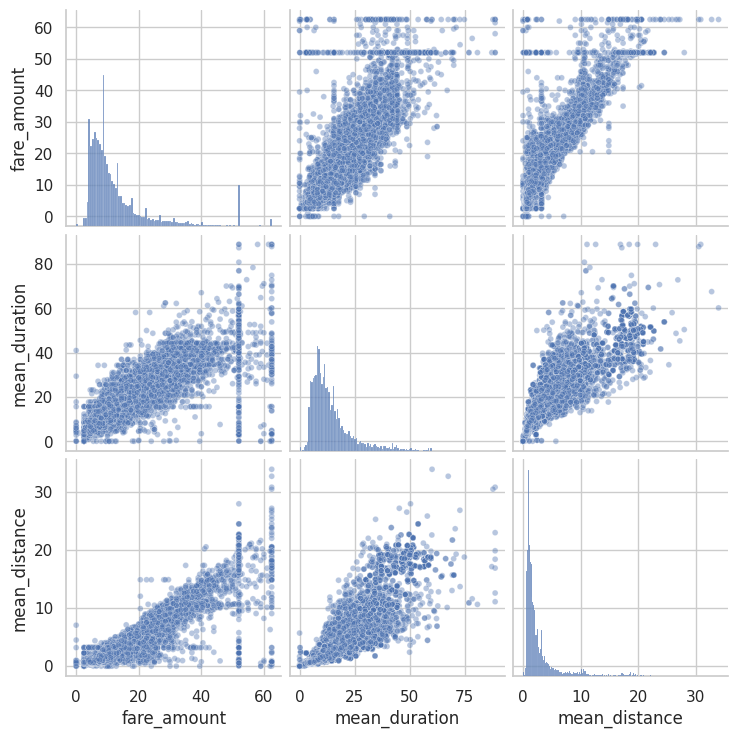

In [181]:
# creating pairplot to visualize pairwise relationships between variables in the data
sns.pairplot( df2[["fare_amount", "mean_duration", "mean_distance"]], plot_kws={"alpha":0.4, "size":5} )

In [182]:
# creating correlation matrix (pairwise correlation) using pearson correlation coefficient
df2.corr(method="pearson")

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


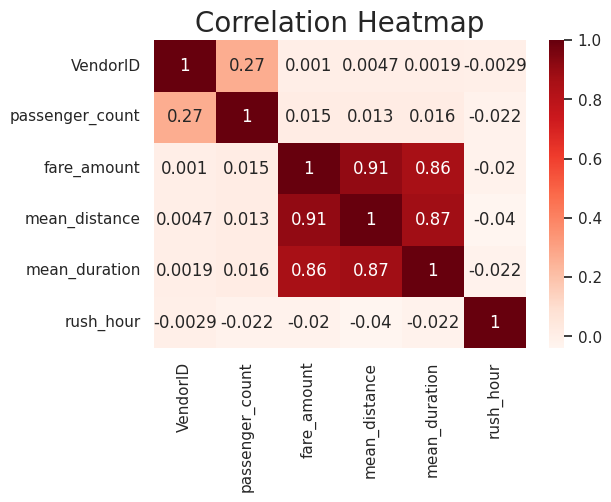

In [183]:
# creating correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method="pearson"), annot=True, cmap="Reds")
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

The features mean duration and mean distance have high correlations with the target variable fare amount, as well as with each other, with a Pearson correlation of 0.87. This can be challenging when the goal is to draw insights from the data but is less of a concern if the focus is on accurate prediction.

In [184]:
# isolating the features (X) and the target variable (y)
y = df2[["fare_amount"]]
X = df2.drop(columns=["fare_amount", "mean_duration"])

# converting VendorID to string
X["VendorID"] = X["VendorID"].astype(str)
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,rush_hour,VendorID_2
0,6,3.521667,0,True
1,1,3.108889,0,False
2,1,0.881429,1,False
3,1,3.700000,0,True
4,1,4.435000,0,True


In [185]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [186]:
# standardizing the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fitting the model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [187]:
# evaluating the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print("Coefficient of Determination:", r_sq)
y_pred_train = lr.predict(X_train_scaled)
print("R^2:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of Determination: 0.8231496356930217
R^2: 0.8231496356930217
MAE: 2.5231224650066926
MSE: 19.754458746455168
RMSE: 4.444598828517054


In [188]:
# evaluating the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print("Coefficient of Determination:", r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test,y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of Determination: 0.8514790334355419
R^2: 0.8514790334355419
MAE: 2.451196205646247
MSE: 16.151149221638228
RMSE: 4.018849240969139


In [189]:
# storing the results
results = pd.DataFrame(data={"actual": y_test["fare_amount"],
                             "predicted": y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]

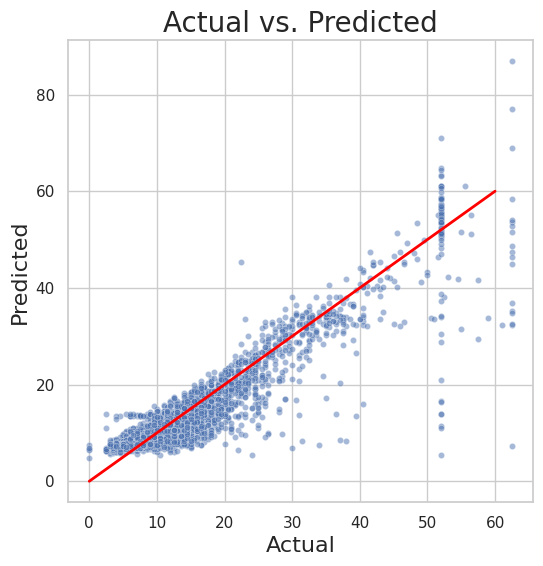

In [190]:
# creating scatterplot to visualize the relationship between predicted and actual values
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style="whitegrid")
sns.scatterplot(x="actual",
                y="predicted",
                data=results,
                s=20,
                alpha=0.5,
                ax=ax,
                zorder=3
)
plt.plot([0,60], [0,60], color="red", linewidth=2, zorder=5)   # perfect model behavior
plt.title("Actual vs. Predicted", fontsize=20)
plt.xlabel("Actual", fontsize=16)
plt.ylabel("Predicted", fontsize=16)
plt.grid(zorder=0)
plt.show()

Text(0, 0.5, 'Count')

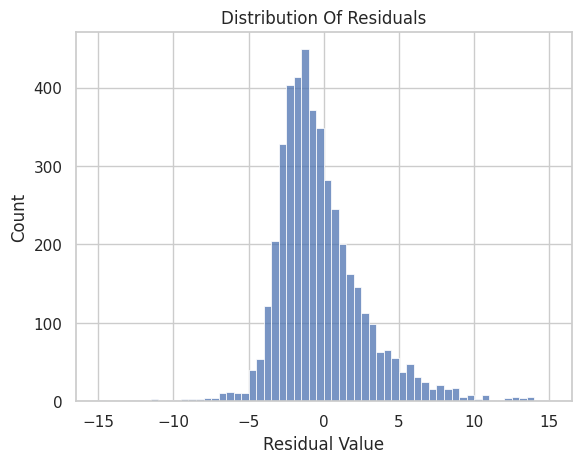

In [191]:
# creating a histogram to visualize the distribution of the residuals
sns.histplot(results["residual"], bins=np.arange(-15,15.5,0.5))
plt.title("Distribution Of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")

In [192]:
results["residual"].mean()

0.011972029457518825

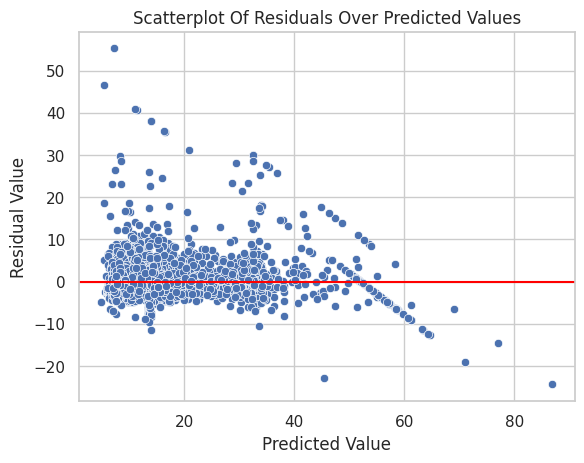

In [193]:
# creating a scatterplot of residuals over predicted
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0, color="red")
plt.title("Scatterplot Of Residuals Over Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")
plt.show()

In [194]:
# getting the beta coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,rush_hour,VendorID_2
0,0.042461,9.593342,0.149139,-0.061886


In [195]:
# calculating the standard deviation of the mean distance in the traing X data
print(X_train["mean_distance"].std())

# dividing the model coefficient by the standard deviation
print(coefficients["mean_distance"][0] / X_train["mean_distance"].std())

3.574812975256415
2.683592745526814


In [196]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [197]:
# creating new df containing just the RatecodeID col from the whole dataset
final_preds = df[["RatecodeID"]].copy()

# creating new column containing all the predictions
final_preds["y_preds_full"] = y_preds_full

# imputing a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds["RatecodeID"]==2, "y_preds_full"] = 52

In [198]:
final_preds = final_preds["y_preds_full"]
print("R^2:", r2_score(y, final_preds))
print("MAE:", mean_absolute_error(y, final_preds))
print("MSE:", mean_squared_error(y, final_preds))
print("RMSE:",np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8740393130683263
MAE: 2.318761403665594
MSE: 13.9955775781507
RMSE: 3.7410663691186636


The model's performance remains strong across training and testing datasets, with minimal bias and no signs of overfitting. Testing data yielded an R² of 0.851, meaning that 85.1% of the fare amount variation is captured by the model. A normal distribution of residuals around zero, with a mean close to zero (-0.015), is ideal as it suggests that the errors are balanced and unbiased. While the model generally performs well, certain trends in the residuals indicate where improvements could be made, such as handling the maximum fare cap of \$62.50 or the \$52 flat rate for JFK airport trips.

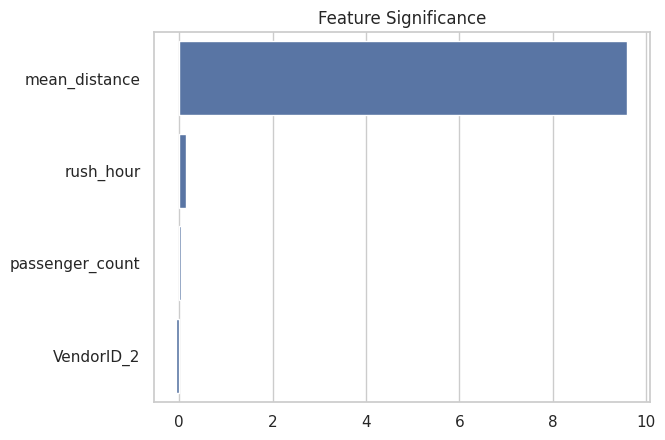

In [199]:
# creating list of tuples for the feature and its coefficient
feature_significance = list(zip(X_train.columns, lr.coef_[0]))
feature_significance = sorted(feature_significance, key=lambda x: x[1], reverse=True)

# plotting feature significance
sns.barplot(x=[x[1] for x in feature_significance],
            y=[x[0] for x in feature_significance],
            orient="h")
plt.title("Feature Significance")
plt.show()

In [200]:
# combining columns for key features and predicted fare amounts
nyc_preds_means = df[["mean_duration", "mean_distance"]].copy()
nyc_preds_means["predicted_fare"] = final_preds
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,14.519583
1,24.470370,3.108889,13.371574
2,7.250000,0.881429,7.720417
3,30.250000,3.700000,14.833352
4,14.616667,4.435000,16.805847


Multiple linear regression is effective for predicting a continuous target variable using multiple inputs. Fine-tuning models often involves iterative adjustments to select the best-fitting variables while maintaining proper model assumptions. The analysis highlights the importance of meeting linear regression assumptions, as well as the MAE and RMSE values for evaluating the model. To prevent data leakage, it is advisable to calculate means using only training data before applying them to the test data. Additionally, handling RatecodeID values separately before model training could be more precise. Finally, modeling pipelines would handle data preparation and predictions in a more automated and streamlined manner, reducing the need for manual intervention at each step.